## Cars Data Regression Analysis
Predicting price of cars 

### Loading Libraries


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import * 
import seaborn as sns


### Loading the Cars Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
# Reading the Cars Dataset
cars = pd.read_csv('cars.csv')

### Descriptive Analytics


In [ ]:
# first five rows
cars.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [ ]:
# Removing 2 door cars 
cars = cars.query('doors > 2')

In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [ ]:
# Removing 3 door cars 
cars = cars.query('doors > 3')

In [ ]:
# Doors Distribution
cars.doors.value_counts()

5    674
4    138
Name: doors, dtype: int64

In [ ]:
# last few rows
cars.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1416,8950,79,40093,Petrol,110,0,Red,0,1600,5,19,1114
1420,8150,76,36537,Petrol,110,0,Red,1,1600,4,85,1075
1425,7950,80,34000,Petrol,86,1,Silver,0,1300,4,69,1000
1429,8950,78,24000,Petrol,86,1,Green,1,1300,5,85,1065
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [ ]:
# dataset infor
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           812 non-null    int64 
 1   age             812 non-null    int64 
 2   km              812 non-null    int64 
 3   fuel_type       812 non-null    object
 4   hp              812 non-null    int64 
 5   metallic_color  812 non-null    int64 
 6   color           812 non-null    object
 7   automatic       812 non-null    int64 
 8   cc              812 non-null    int64 
 9   doors           812 non-null    int64 
 10  tax             812 non-null    int64 
 11  weight          812 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 82.5+ KB


In [ ]:
# Unique Values
cars.nunique()

price             186
age                75
km                747
fuel_type           3
hp                 10
metallic_color      2
color              10
automatic           2
cc                 10
doors               2
tax                13
weight             48
dtype: int64

In [ ]:
# changing to categorical
cars.metallic_color = cars.metallic_color.astype('category')

In [ ]:
# Car info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           812 non-null    int64   
 1   age             812 non-null    int64   
 2   km              812 non-null    int64   
 3   fuel_type       812 non-null    object  
 4   hp              812 non-null    int64   
 5   metallic_color  812 non-null    category
 6   color           812 non-null    object  
 7   automatic       812 non-null    int64   
 8   cc              812 non-null    int64   
 9   doors           812 non-null    int64   
 10  tax             812 non-null    int64   
 11  weight          812 non-null    int64   
dtypes: category(1), int64(9), object(2)
memory usage: 77.0+ KB


In [ ]:
# changing to categorical
cars.automatic = cars.automatic.astype('category')

In [ ]:
# changing to categorical
cars.doors = cars.doors.astype('category')

In [ ]:
# changing to categorical
cars.cc = cars.cc.astype('category')


In [ ]:
# Car info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 43 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           812 non-null    int64   
 1   age             812 non-null    int64   
 2   km              812 non-null    int64   
 3   fuel_type       812 non-null    object  
 4   hp              812 non-null    int64   
 5   metallic_color  812 non-null    category
 6   color           812 non-null    object  
 7   automatic       812 non-null    category
 8   cc              812 non-null    category
 9   doors           812 non-null    category
 10  tax             812 non-null    int64   
 11  weight          812 non-null    int64   
dtypes: category(4), int64(6), object(2)
memory usage: 61.0+ KB


## Graphical Summaries

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


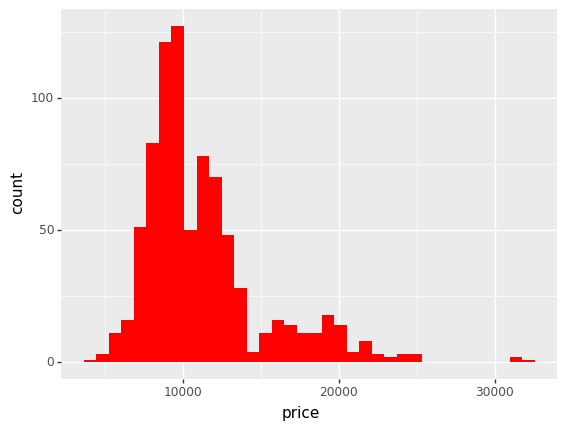

<ggplot: (8772035713737)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'price')) + geom_histogram(fill = 'red')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


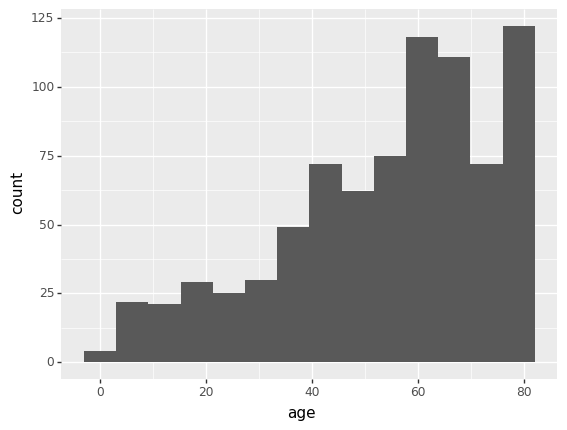

<ggplot: (8772032720109)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'age')) + geom_histogram()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


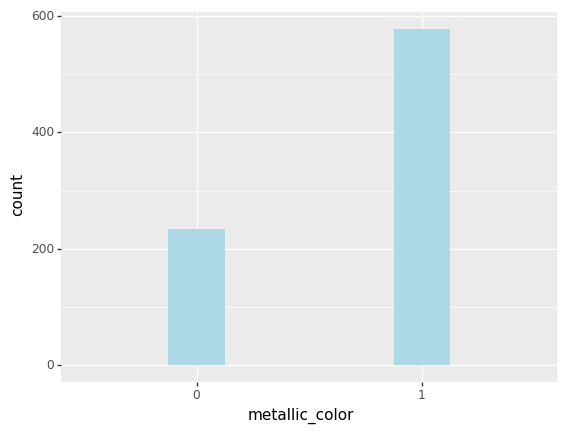

<ggplot: (8772032688553)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'metallic_color')) + geom_histogram(fill = 'lightblue')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 72'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


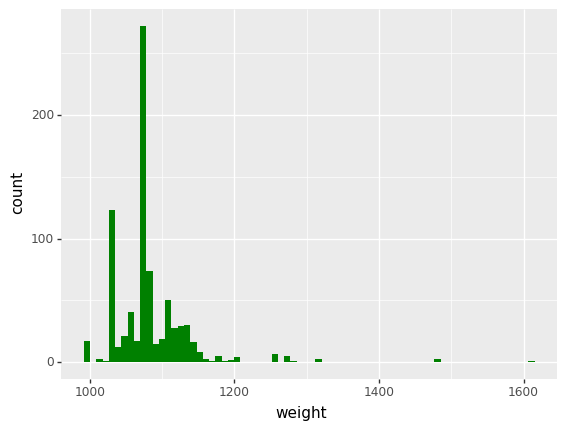

<ggplot: (8772032710961)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'weight')) + geom_histogram(fill = 'green')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


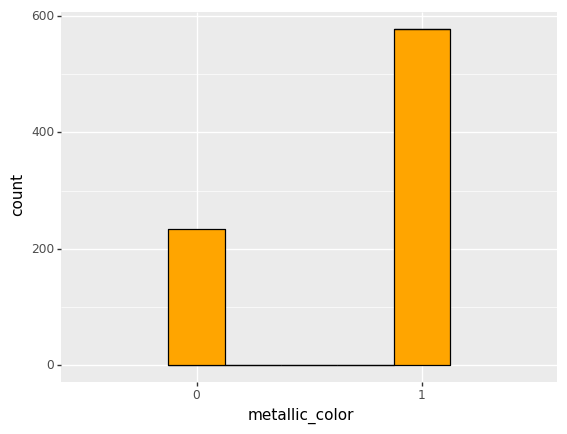

<ggplot: (8772032663765)>

In [ ]:
# Price histogram
ggplot(cars, aes(x = 'metallic_color')) + geom_histogram(fill = 'orange', color = 'black')

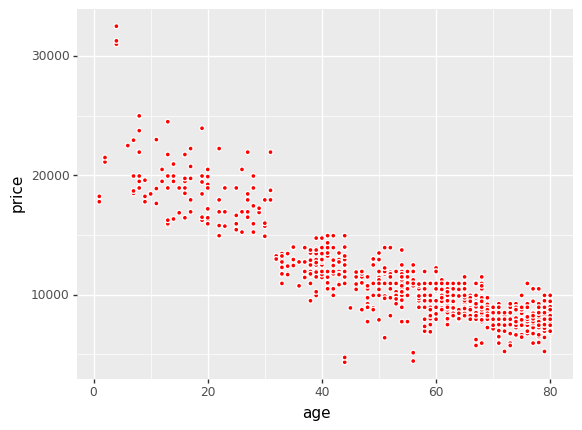

<ggplot: (8772032688417)>

In [ ]:
# Scatterplot price vs age
ggplot(cars, aes(x = 'age', y = 'price')) + geom_point(fill = 'red', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


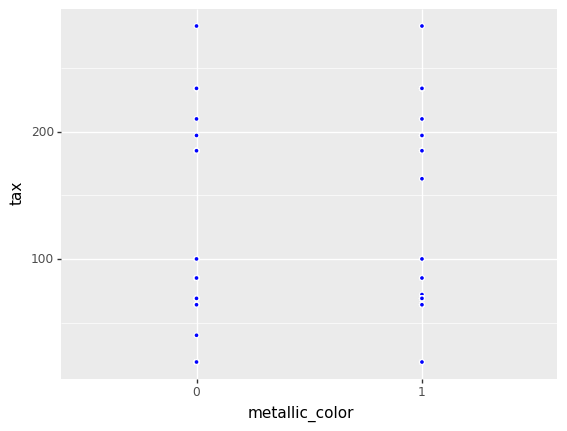

<ggplot: (8772032589437)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'metallic_color', y = 'tax')) + geom_point(fill = 'blue', color = 'white')

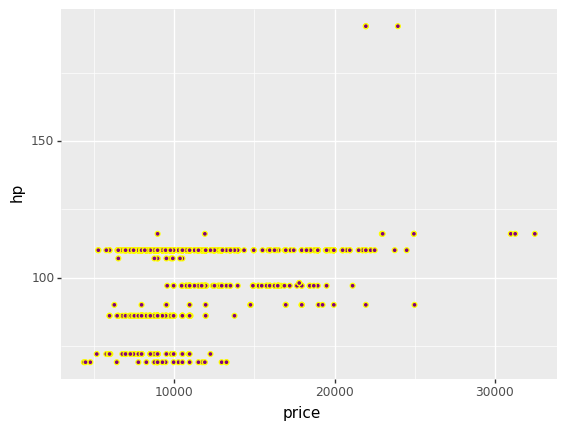

<ggplot: (8772032688489)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'price', y = 'hp')) + geom_point(fill = 'purple', color = 'yellow')

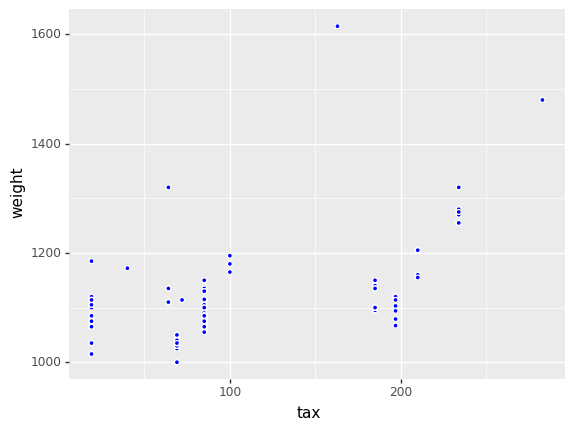

<ggplot: (8772030971017)>

In [ ]:
# Scatterplot metallic_color vs tax
ggplot(cars, aes(x = 'tax', y = 'weight')) + geom_point(fill = 'blue', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


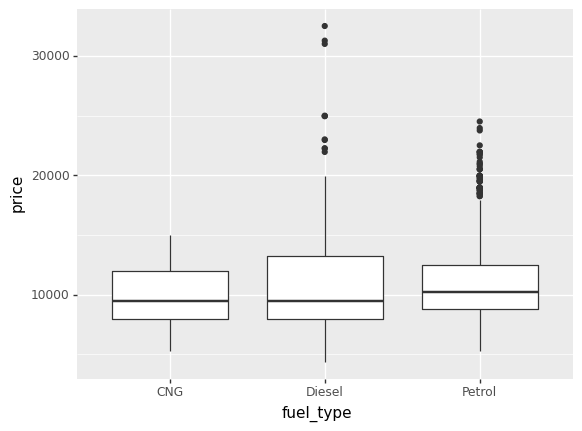

<ggplot: (8772030966873)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'fuel_type', y = 'price')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


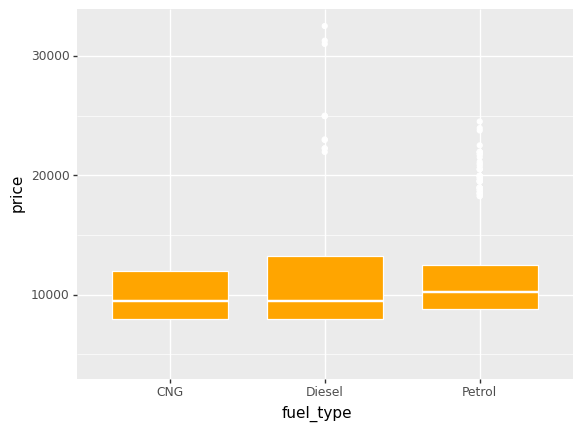

<ggplot: (8772030971521)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'fuel_type', y = 'price')) + geom_boxplot(fill = 'orange', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


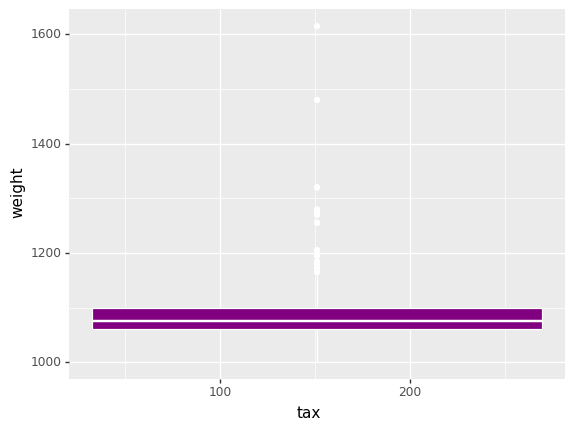

<ggplot: (8772030904445)>

In [ ]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'tax', y = 'weight')) + geom_boxplot(fill = 'purple', color = 'white')

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


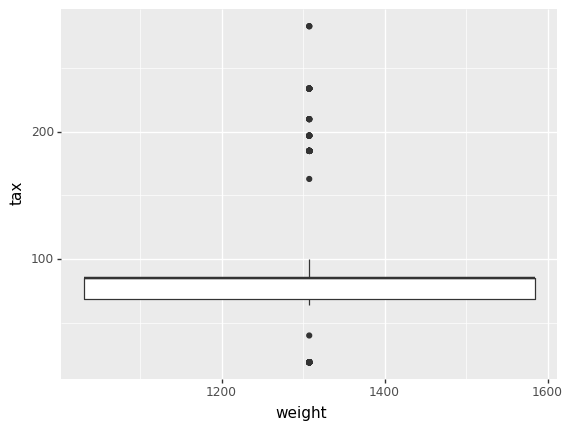

<ggplot: (8772032555529)>

In [ ]:
# boxplot tax vs weight
ggplot(cars, aes(x = 'weight', y = 'tax', fill = 'weight')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


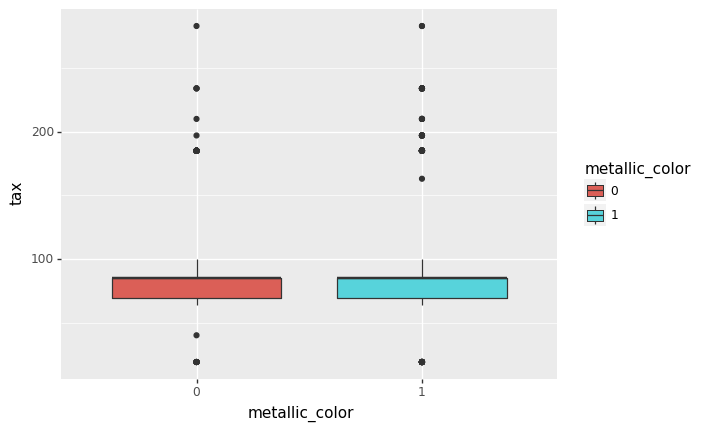

<ggplot: (8772030791041)>

In [ ]:
# boxplot tax vs metallic_color
ggplot(cars, aes(x = 'metallic_color', y = 'tax', fill = 'metallic_color')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


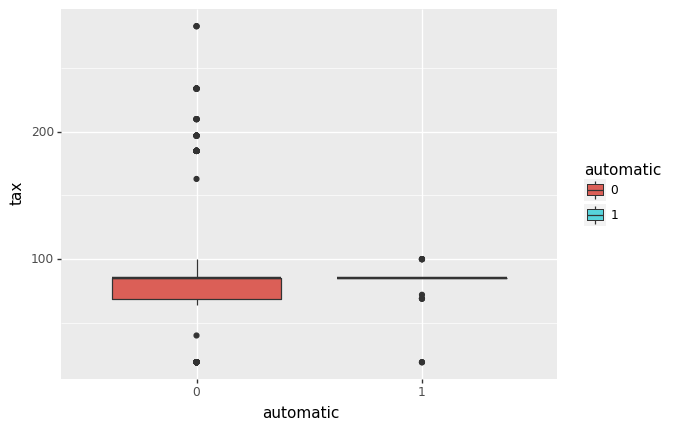

<ggplot: (8772030812389)>

In [ ]:
# boxplot tax vs automatic
ggplot(cars, aes(x = 'automatic', y = 'tax', fill = 'automatic')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


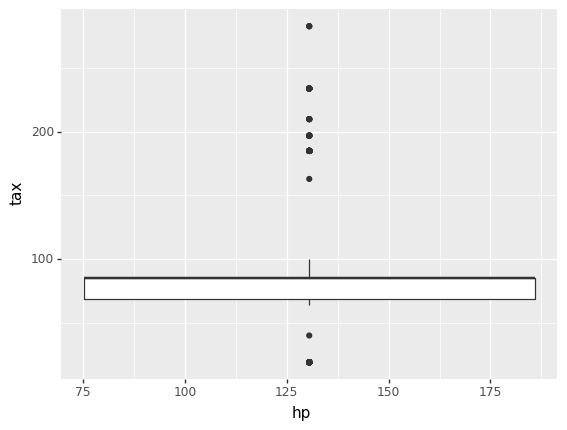

<ggplot: (8772030782685)>

In [ ]:
# boxplot tax vs hp
ggplot(cars, aes(x = 'hp', y = 'tax', fill = 'hp')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


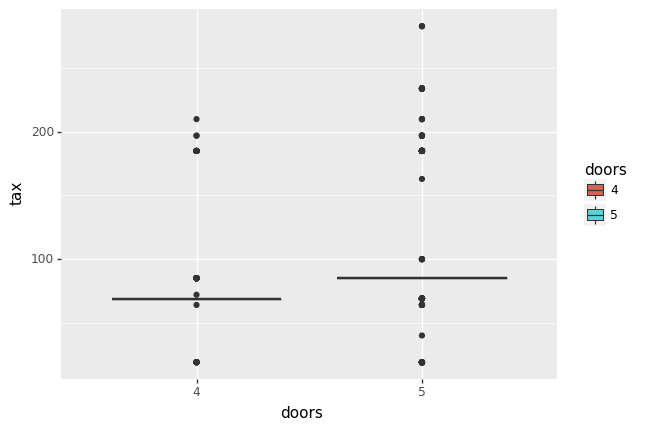

<ggplot: (8772030734581)>

In [ ]:
# boxplot tax vs doors
ggplot(cars, aes(x = 'doors', y = 'tax', fill = 'doors')) + geom_boxplot()

In [ ]:
# correlation matrix
cars.corr()

,price,age,km,hp,tax,weight
price,1.000000,-0.882905,-0.604809,0.252953,0.207602,0.585006
age,-0.882905,1.000000,0.549906,-0.132031,-0.151934,-0.464698
km,-0.604809,0.549906,1.000000,-0.382732,0.286587,-0.042196
hp,0.252953,-0.132031,-0.382732,1.000000,-0.345328,-0.005182
tax,0.207602,-0.151934,0.286587,-0.345328,1.000000,0.640472
weight,0.585006,-0.464698,-0.042196,-0.005182,0.640472,1.000000


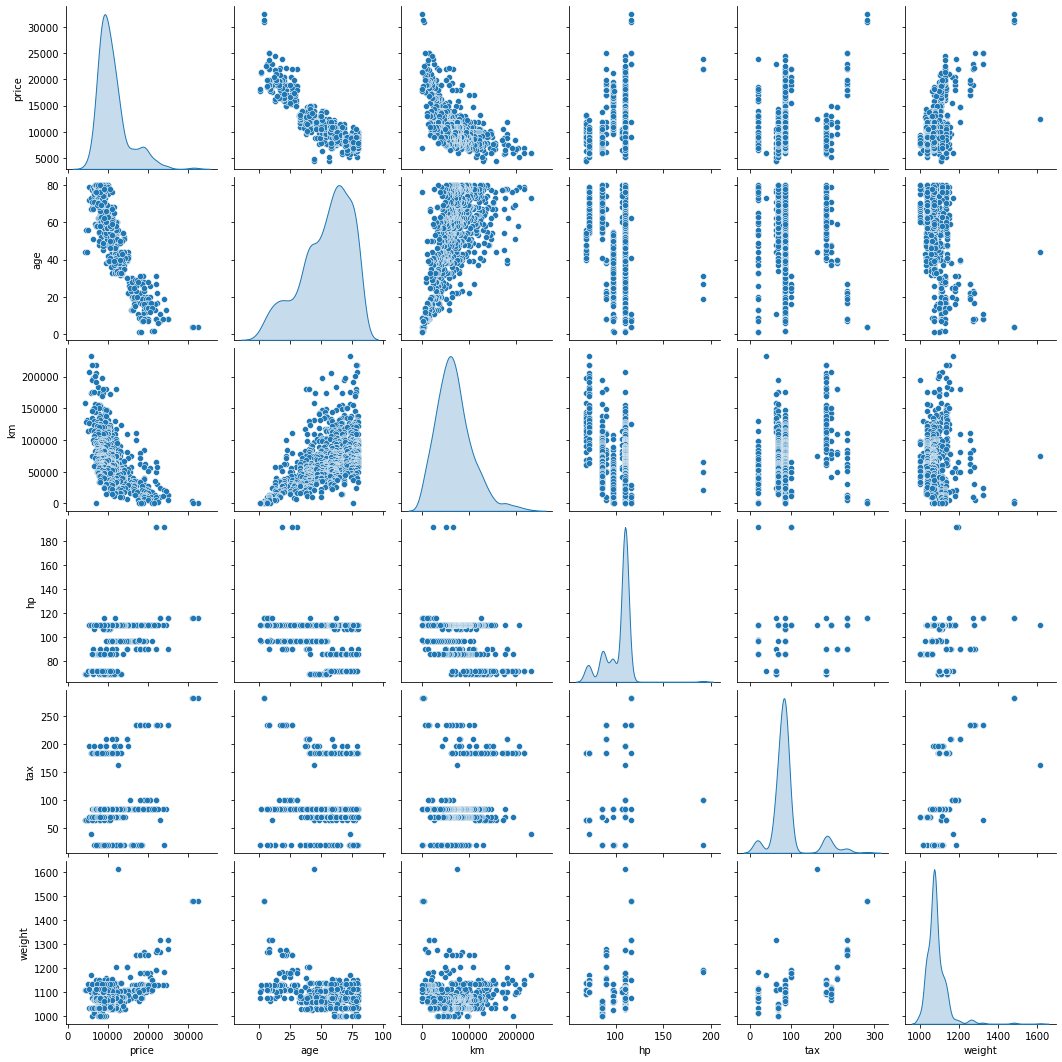

In [ ]:
# scatterplot matrix
sns.pairplot(cars, diag_kind= 'kde')

## Predictive analysis: Choosing predictors


In [ ]:
# choosing predictors
predictors = ['age', 'km', 'weight', 'fuel_type', 'metallic_color', 'doors']

In [ ]:
# Target variable
target = 'price'

In [ ]:
# creating dummy variables
X = pd.get_dummies(cars[predictors], drop_first= True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_5
43,27,110404,1255,1,0,0,1
44,22,100250,1255,1,0,0,1
45,23,84000,1270,1,0,0,1
46,27,79375,1255,1,0,1,1
47,22,75048,1110,0,1,1,1


In [ ]:
# Target variable 
y = cars[target]
y[0:5]


43    16950
44    16950
45    19000
46    17950
47    15800
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:4]


43    16950
44    16950
45    19000
46    17950
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:3]


43    16950
44    16950
45    19000
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:2]


43    16950
44    16950
Name: price, dtype: int64

In [ ]:
# Target variable 
y = cars[target]
y[0:1]


43    16950
Name: price, dtype: int64

## Predictive Analytics: Creating Training and Testing Datasets 

In [ ]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val, = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [ ]:
# train.info
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 406 to 856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               649 non-null    int64
 1   km                649 non-null    int64
 2   weight            649 non-null    int64
 3   fuel_type_Diesel  649 non-null    uint8
 4   fuel_type_Petrol  649 non-null    uint8
 5   metallic_color_1  649 non-null    uint8
 6   doors_5           649 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 22.8 KB


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 690 to 1231
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               163 non-null    int64
 1   km                163 non-null    int64
 2   weight            163 non-null    int64
 3   fuel_type_Diesel  163 non-null    uint8
 4   fuel_type_Petrol  163 non-null    uint8
 5   metallic_color_1  163 non-null    uint8
 6   doors_5           163 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 5.7 KB


In [ ]:
y_train.head()

406    10950
611     7950
228    12450
692     9950
533    11895
Name: price, dtype: int64

In [ ]:
y_val.head()

690      8750
252     11750
1322     8950
1127     8700
1165     8900
Name: price, dtype: int64

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
x_train_std[0:5]

array([[-0.16468183,  0.86277217,  1.0212121 ,  2.70564462, -2.52487623,
        -1.61417334,  0.45669039],
       [ 0.65079557,  2.17964301, -0.61574278, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [-0.62338786, -0.10211009, -0.07009115, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [ 0.34499154,  0.72243342, -0.16103309, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [-0.11371449, -0.52553518, -0.16103309, -0.36959769,  0.39605902,
        -1.61417334,  0.45669039]])

In [ ]:
x_train_std[0:4]

array([[-0.16468183,  0.86277217,  1.0212121 ,  2.70564462, -2.52487623,
        -1.61417334,  0.45669039],
       [ 0.65079557,  2.17964301, -0.61574278, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [-0.62338786, -0.10211009, -0.07009115, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [ 0.34499154,  0.72243342, -0.16103309, -0.36959769,  0.39605902,
         0.61951215,  0.45669039]])

In [ ]:
x_train_std[0:3]

array([[-0.16468183,  0.86277217,  1.0212121 ,  2.70564462, -2.52487623,
        -1.61417334,  0.45669039],
       [ 0.65079557,  2.17964301, -0.61574278, -0.36959769,  0.39605902,
         0.61951215,  0.45669039],
       [-0.62338786, -0.10211009, -0.07009115, -0.36959769,  0.39605902,
         0.61951215,  0.45669039]])

In [ ]:
x_train_std[0:2]

array([[-0.16468183,  0.86277217,  1.0212121 ,  2.70564462, -2.52487623,
        -1.61417334,  0.45669039],
       [ 0.65079557,  2.17964301, -0.61574278, -0.36959769,  0.39605902,
         0.61951215,  0.45669039]])

In [ ]:
x_train_std[0:1]

array([[-0.16468183,  0.86277217,  1.0212121 ,  2.70564462, -2.52487623,
        -1.61417334,  0.45669039]])

## Linear regression model


In [ ]:
# import the libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Linear model
model = LinearRegression()

In [ ]:
# train the model 
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(x_val)

In [ ]:
# MSE mean squared error
mean_squared_error(y_val, y_pred)

1425961.7114377206

In [ ]:
# RMSE squareroot of MSE
mean_squared_error(y_val, y_pred) ** 0.5

1194.136387284853

In [ ]:
cars.price.mean()

11214.897783251232

In [ ]:
# R square (0 to 1)
r2_score(y_val, y_pred)

0.9019918780435201

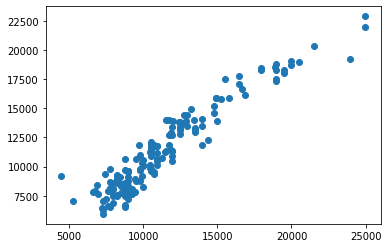

In [ ]:
# Plot y_val vs y_pred
plt.scatter(y_val, y_pred)

## Cross Validation

In [ ]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(scores *-1)
print('Mean RMSE', scores.mean()*-1)

[3141.86762075 2837.39497362 1395.11387831 1637.22144323 1095.24683921
  952.61545842  942.0095963  1474.77673508 1102.50753449 1173.01905487]
Mean RMSE 1575.1773134280131


In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 9, scoring = 'neg_root_mean_squared_error')
scores

array([-0.30668644, -0.34073494, -0.27423851, -0.46526477, -0.41475786,
       -0.47850232, -0.43518798, -0.24071532, -0.34633766])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 8, scoring = 'neg_root_mean_squared_error')
scores

array([-0.39676881, -0.30371997, -0.37202997, -0.41624953, -0.4689004 ,
       -0.48024142, -0.23655522, -0.34790244])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 7, scoring = 'neg_root_mean_squared_error')
scores

array([-0.60946753, -0.26557279, -0.44620549, -0.41361181, -0.48253359,
       -0.3107562 , -0.35420912])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 6, scoring = 'neg_root_mean_squared_error')
scores

array([-0.68717203, -0.27402914, -0.44007394, -0.47405858, -0.36560328,
       -0.36304816])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 5, scoring = 'neg_root_mean_squared_error')
scores

array([-0.75063189, -0.37202489, -0.42672866, -0.43258099, -0.37810172])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 4, scoring = 'neg_root_mean_squared_error')
scores

array([-0.70928688, -0.41871167, -0.47812588, -0.37569804])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 3, scoring = 'neg_root_mean_squared_error')
scores

array([-0.77423109, -0.45283641, -0.43284209])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 2, scoring = 'neg_root_mean_squared_error')
scores

array([-0.56074912, -0.67553888])

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_std, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print (scores * -1)
print('Mean RMSE', scores.mean()*-1)

[0.2608059  0.38300754 0.1869389  0.47081249 0.3903151  0.46031294
 0.48688523 0.36748424 0.25226544 0.344612  ]
Mean RMSE 0.36034397624485026


### Decision Tree Model

In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state =0, max_depth= 4)
model.fit(x_train_std, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = 'tree.dot', impurity = True, filled = True, rounded = True, feature_names= x_train.columns[0 : 8],
                class_names = ['0', '1'])

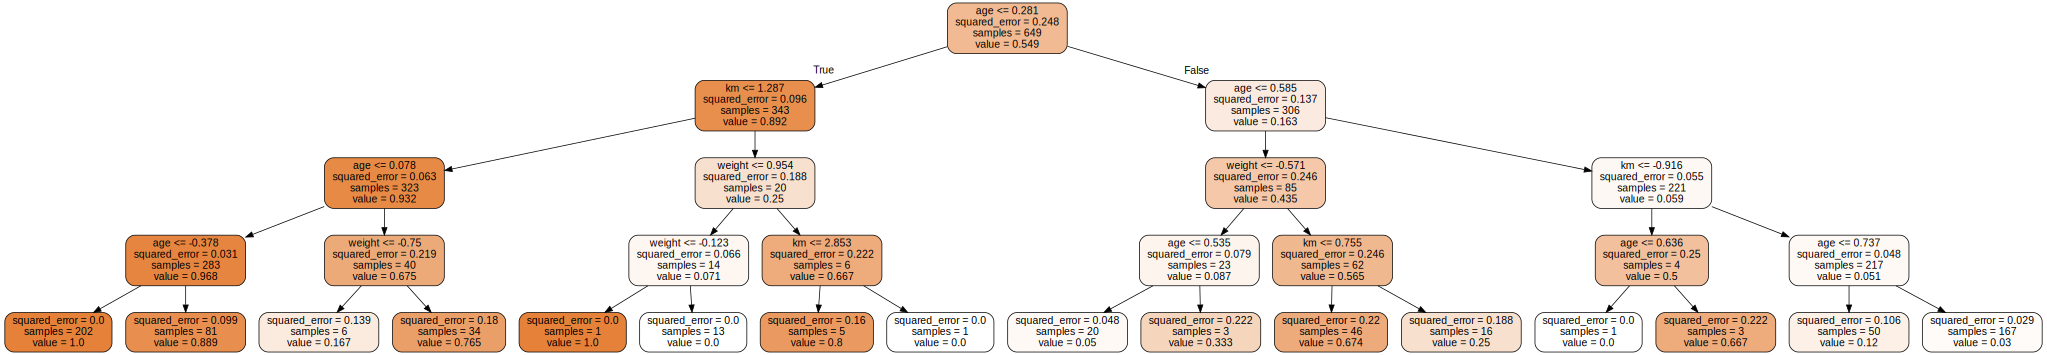

In [ ]:
# plot the tree
import  graphviz 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# predicting car price
y_pred = model.predict(x_val_std)

In [1]:
# mean square error
mean_squared_error(y_val, y_pred)

NameError: ignored